<a href="https://colab.research.google.com/github/PUNNYA-P-GAUR/Machine-Learning/blob/main/Tensorflow(DEEP_LEARNING_ON_MNIST_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow==2.0.0


     |████████████████████████████████| 86.3 MB 51 kB/s 
     |████████████████████████████████| 3.8 MB 35.7 MB/s 
     |████████████████████████████████| 449 kB 52.8 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7a312b07019c7f12b76f9bca6d47d69a0aaba068b55a857c2900399e137a44f3
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [5]:

!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 43 kB/s 


In [6]:
import tensorflow as tf
from tensorflow import keras

In [8]:
print(tf.__version__)

2.0.0


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:

mnist = keras.datasets.fashion_mnist

In [11]:
type(mnist)

module

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [15]:
np.max(X_train)

255

In [16]:
np.mean(X_train)

72.94035223214286

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_test.shape


(10000, 28, 28)

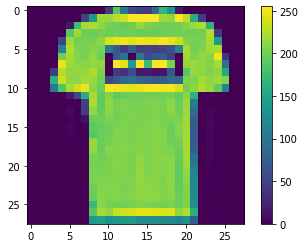

In [22]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
X_train=X_train/255

In [25]:
X_test=X_test/255


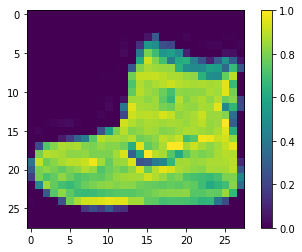

In [46]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [33]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [36]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.5016 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3777 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3393 - accuracy: 0.8748
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.3142 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2960 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2819 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2692 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.2579 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2479 - accuracy: 0.9083
Epo

In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([[8.66363479e-08, 1.95355065e-10, 3.63424346e-10, ...,
        1.92662526e-04, 4.34509673e-08, 9.99758542e-01],
       [3.30417024e-05, 2.22522603e-13, 9.98566091e-01, ...,
        1.31476090e-14, 1.12190958e-10, 3.91943747e-13],
       [1.11529310e-08, 1.00000000e+00, 2.89242501e-12, ...,
        7.11071648e-19, 6.82880239e-13, 1.03580020e-17],
       ...,
       [2.50067475e-04, 3.26080690e-10, 5.51843899e-04, ...,
        3.72626637e-05, 9.95388746e-01, 1.01826575e-10],
       [7.99541500e-09, 9.99992609e-01, 4.82785253e-12, ...,
        2.04115154e-12, 1.59081068e-10, 8.23641155e-11],
       [1.02840895e-05, 9.91515064e-11, 1.06789926e-07, ...,
        4.90286213e-04, 2.18483867e-04, 2.57404736e-06]], dtype=float32)

In [41]:
y_pred[0]

array([8.6636348e-08, 1.9535507e-10, 3.6342435e-10, 1.0955976e-11,
       2.1281128e-09, 4.8712904e-05, 2.3740691e-08, 1.9266253e-04,
       4.3450967e-08, 9.9975854e-01], dtype=float32)

In [42]:
class_names

['top',
 'trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [44]:
np.argmax(y_pred[0])

9

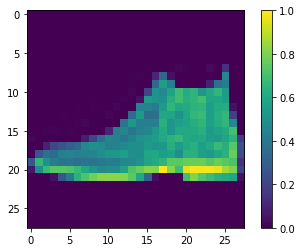

In [47]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()

In [50]:
y_pred[1]

array([3.3041702e-05, 2.2252260e-13, 9.9856609e-01, 5.8749582e-13,
       7.0371287e-04, 5.0839569e-16, 6.9714960e-04, 1.3147609e-14,
       1.1219096e-10, 3.9194375e-13], dtype=float32)

In [51]:
np.argmax(y_pred[1])

2